# DAE 8 t-test

author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals

After working your way through this notebook you should be able to..
- Choose the appropriate t-test for your data
- Perform and interpret a t-test using available functions

## Table of Contents

- [1. Student t-test](#whatttest)
    - [1.2. When can we use t-tests](#whenttest)
- [2. T-test for two independent samples](#Indepttest)
- [3. T-test for two related samples](#relttest)

<a id= 'Descriptive'> </a>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<a id= 'whatttest'> </a>

## 1. Student t-test

If we happen to know the true population mean $\mu$ of normally distributed data it is easy to say whether the sample mean is very far from it. In a z-test, values are converted to the standard normal distribution in order to see if the sample is close or distant to the population mean. 

When when the population mean $\mu$ and variance $\sigma^2$ are not known we can estimate them using the sample mean $\bar{X}$ and standard deviation
$s^2$. As the sample is likely to underestimate the variability in the
true population, the testing is done using a statistic measure with
another distribution than the normal. The *t-distribution* is similar to
the normal distribution, but wider and flatter because it should
compensate for the fact that samples underestimate the variability in
the true population.

When the statistic is calculated, one needs to determine if it falls in
the *critical region*. That is, if the difference between the expected
and observed value is so large that it is unlikely to occur by chance.
You can look up the critical value, the cut-off point for the critical
region, in a table. This value depend on the chosen significance level
("alpha", $\alpha$) and the *degrees of freedom* (df).

For the t-test, the degrees of freedom (df or dof) refer to the values
in the sample size number that are free to vary once the means are
known. Because the true population mean $\mu$ and variance $\sigma^2$
are unknown, one degree must be "sacrificed" to estimate the mean when
estimating variability. The larger the sample, the more similar the
t-distribution becomes to that of a normal distribution.

As a rule of thumb you can calculate the degrees of freedom as the
sample size $N$ minus the number of sample groups. In the case of
single sample t-test, there is only one group so df=N-1. When you have
two groups to compare, two mean values need to be estimated, and thus
df=N-2.

Most test functions perform this look-up for you, and report the
probability directly. Note, however, that when reporting statistical
results one is expected not only to report the probability and whether
this is below the chosen criteria for significance, but also the actual test statistics and degrees of freedom (so that the reader can check that the results appear sound).



<a id= 'whenttest'> </a>

### 1.2. When can we use t-tests? 

T-tests are parametric tests and therefore data should be parametric, that is 

- Data should be on interval or ratio scale

- Variances should be approximately equal for different groups 

- Data comes from a population with normal distribution

This means that if measurements of one of the groups has three
times the variance of the other, or one of the groups appear to have a
bi-modal distribution rather than a normal distribution , the test will
not show a correct result. 


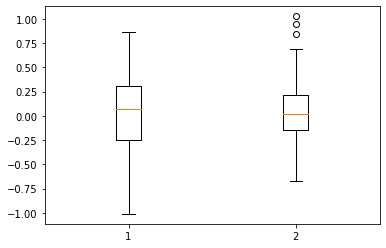

In [20]:
#TRY OUT: Does this data fulfil the assumptions for parametric tests?

K=40 #variable for sample size
score1=np.random.normal(0.025,0.5,K)
score2=np.random.normal(0.01,0.5,K)

plt.boxplot([score1,score2])
plt.show()

#plot qq-plots and perform tests for normality and equal variance

To choose the right test, we also need to know whether the data points are *related* or *unrelated*.

<a id= 'Indepttest'> </a>

## 2. Student t-test for two independent samples


When comparing two different groups, as in a between groups design, the
samples from the two groups should be independent. The t-statistic for
*two independent samples* is a ratio. The t-value is calculated as the
difference (in means) *between* groups divided by the variability
*within* groups. :
$$t  =\frac {\bar{X}_1-\bar{X}_2} {\sqrt{\frac{s_1^2}{N_1}+\frac{s_2^2}{N_2}}}$$

Where $\bar{X}_1$ and $\bar{X}_2$ are sample means and the sample
variance $s^2$ for each group is calculated as 

$$s^2  =\frac {\sum_i^N{ (X_i-\bar{X})^2}} {N-1}$$


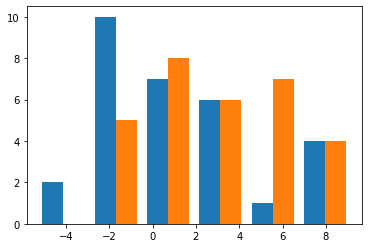

In [17]:
#We generate some data
K=30
groupA=np.random.normal(1.8,3,K)

groupB=np.random.normal(2.9,3,K)


#plot the histograms of data
plt.hist([groupA,groupB], bins=6)
plt.show()

### Try out 1: 
Perform an independent t-test with the data for groups A and B (as generated above). What does the output mean?

In [4]:
#First check help(stats.ttest_ind)

#then modify this call to get the output of the test
#stats.ttest_ind( )

<a id= 'relttest'> </a> 

## 3.  t-test for two related samples

In a repeated measures design, the two samples are not independent
because they come from the same individuals (who are participating in
all experimental conditions). The null hypothesis would be that there
are no significant differences between the conditions, and so the
t-statistic is calculated to test the *difference* between the paired
scores in the two cases. This test is also called paired samples t-test
and is, in principle, the same as a single sample t-test (where the
sample mean $\mu$ but not the variance is known).

$$t  =\frac {\bar{X}-\mu_{expected}} {\sqrt{\frac{s^2}{n}}}$$

Why is that? Well, we do know something about what would be expected if
there is no effect of condition. In that case, the paired scores should
be approximately equal, yielding a difference of zero. So, in contrast
to the single sample, the expected mean $\mu_{expected}$ is always zero. This also means that you cannot use the same function call for related samples, because you would not do the right test.

### Try out 2: 
Assume that scores in group A and B above are dependent (coming from the same participant) and perform a related t-test. 

Is there a difference compared to the independent t-test?

In [38]:
#For a related t-test the function is different:

#help(stats.ttest_rel)

### Try out 3:
The data used for the exercises here has some random variability, being newly drawn each time you assign values to group A and B. Run through the code for independent and dependent t-tests and see how much the result differs between new samples. Also change the sample size. Remember that the power of the test increases with larger sample size, so comparably small effect sizes are more likely to come out as significant as the sample size increases (compare below 30 with 300 and 3000 for example).